In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#import xgboost
#from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import optuna

import warnings
warnings.filterwarnings("ignore")
import random

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import plotly.express as px

d:\Aplikasi\Program\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

seed=42

<Figure size 640x480 with 0 Axes>

In [3]:
laptop = pd.read_csv('laptop_clean.csv')

laptop

,company,product,category,screen(pixel),ram(GB),gpu,os,os_version,weigth(kg),price,...,screentype,touchscreen,cpu_name,cpu_speed(GHz),cpu_brand,storage_1(GB),storage_2(GB),storage_1_type,storage_2_type,gpu_name
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,macOS,1.37,11912523.48,...,IPSPanelRetinaDisplay,0.0,Intel Core i5,2.3,Intel,128.0,0.0,SSD,NaN,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,macOS,1.34,7993374.48,...,NaN,0.0,Intel Core i5,1.8,Intel,128.0,0.0,Flash Storage,NaN,Intel
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,No OS,1.86,5112900.00,...,NaN,0.0,Intel Core i5 7200U,2.5,Intel,256.0,0.0,SSD,NaN,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,macOS,1.83,22563005.40,...,IPSPanelRetinaDisplay,0.0,Intel Core i7,2.7,Intel,512.0,0.0,SSD,NaN,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,macOS,1.37,16037611.20,...,IPSPanelRetinaDisplay,0.0,Intel Core i5,3.1,Intel,256.0,0.0,SSD,NaN,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,32,Nvidia GeForce GTX 1070,Windows,Windows 10,4.42,24897600.00,...,NaN,0.0,Intel Core i7 6700HQ,2.6,Intel,256.0,1000.0,SSD,HDD,Nvidia
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,8,Intel HD Graphics 520,Windows,Windows 10,1.95,10492560.00,...,NaN,0.0,Intel Core i5 6200U,2.3,Intel,256.0,0.0,SSD,NaN,Intel
974,Asus,Rog Strix,Gaming,17.3,16,Nvidia GeForce GTX 1060,Windows,Windows 10,2.73,18227710.80,...,NaN,0.0,Intel Core i7 7700HQ,2.8,Intel,256.0,1000.0,SSD,HDD,Nvidia
975,HP,Probook 450,Notebook,15.6,8,Nvidia GeForce 930MX,Windows,Windows 10,2.04,8705268.00,...,IPSPanel,0.0,Intel Core i5 7200U,2.7,Intel,128.0,1000.0,SSD,HDD,Nvidia


In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         977 non-null    object 
 1   product         977 non-null    object 
 2   category        977 non-null    object 
 3   screen(pixel)   977 non-null    float64
 4   ram(GB)         977 non-null    int64  
 5   gpu             977 non-null    object 
 6   os              977 non-null    object 
 7   os_version      977 non-null    object 
 8   weigth(kg)      977 non-null    float64
 9   price           977 non-null    float64
 10  resolution      977 non-null    object 
 11  screentype      280 non-null    object 
 12  touchscreen     977 non-null    float64
 13  cpu_name        977 non-null    object 
 14  cpu_speed(GHz)  977 non-null    float64
 15  cpu_brand       977 non-null    object 
 16  storage_1(GB)   977 non-null    float64
 17  storage_2(GB)   977 non-null    flo

In [5]:
print(laptop.company)
print("")
print(laptop.company.unique())
print("")
print(laptop.company.value_counts())

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
        ...   
972       Dell
973    Toshiba
974       Asus
975         HP
976     Lenovo
Name: company, Length: 977, dtype: object

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: company, dtype: int64


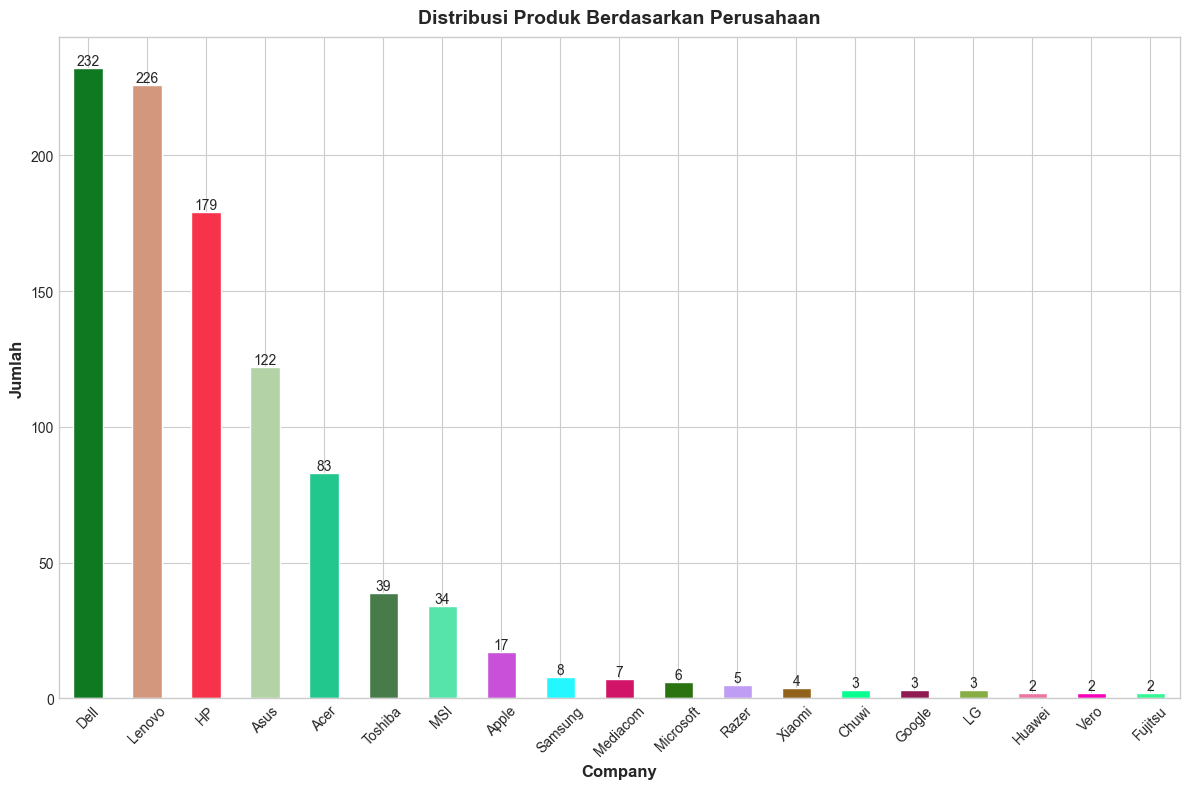

In [6]:
jumlah_company = laptop['company'].value_counts()

colors = ['#'+''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(jumlah_company))]

plt.figure(figsize=(12, 8))
ax = jumlah_company.plot(kind='bar', color = colors)
plt.title("Distribusi Produk Berdasarkan Perusahaan")
plt.xlabel('Company')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [7]:
grouped_company = laptop.groupby('company').size().reset_index(name='counts')
grouped_company = grouped_company.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_company, x='company', y='counts', color='company', labels={'counts':'Jumlah Laptop'}, title="Jumlah Laptop berdasarkan Perusahaan")
fig.show()

In [8]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         977 non-null    object 
 1   product         977 non-null    object 
 2   category        977 non-null    object 
 3   screen(pixel)   977 non-null    float64
 4   ram(GB)         977 non-null    int64  
 5   gpu             977 non-null    object 
 6   os              977 non-null    object 
 7   os_version      977 non-null    object 
 8   weigth(kg)      977 non-null    float64
 9   price           977 non-null    float64
 10  resolution      977 non-null    object 
 11  screentype      280 non-null    object 
 12  touchscreen     977 non-null    float64
 13  cpu_name        977 non-null    object 
 14  cpu_speed(GHz)  977 non-null    float64
 15  cpu_brand       977 non-null    object 
 16  storage_1(GB)   977 non-null    float64
 17  storage_2(GB)   977 non-null    flo

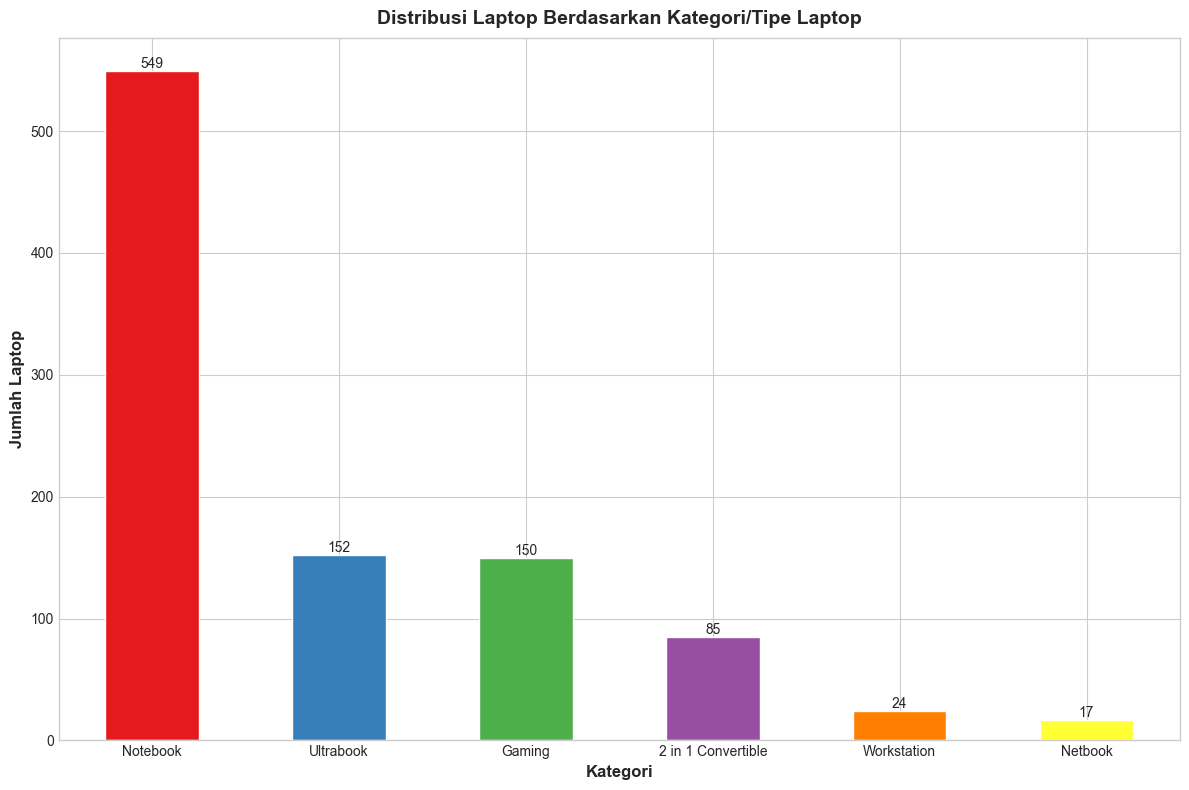

In [9]:
jumlah_kategori = laptop['category'].value_counts()

colors = sns.color_palette('Set1', len(jumlah_kategori))

plt.figure(figsize=(12, 8))
ax = jumlah_kategori.plot(kind='bar', color=colors)
plt.title('Distribusi Laptop Berdasarkan Kategori/Tipe Laptop')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Laptop')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

In [10]:
grouped_kategori = laptop.groupby('category').size().reset_index(name='counts')
grouped_kategori = grouped_kategori.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_kategori, x = 'category', y = 'counts', color = 'category', labels={'counts': 'Jumlah Laptop'}, title="Jumlah Laptop Berdasarkan Kategori/Tipe Laptop")
fig.show()

In [11]:
laptop['screen(pixel)'] = laptop['screen(pixel)'].astype('str')

laptop['screen(pixel)'].unique()

array(['13.3', '15.6', '15.4', '14.0', '12.0', '11.6', '17.3', '10.1',
       '13.5', '12.5', '13.0', '18.4', '13.9', '12.3', '17.0', '15.0',
       '14.1', '11.3'], dtype=object)

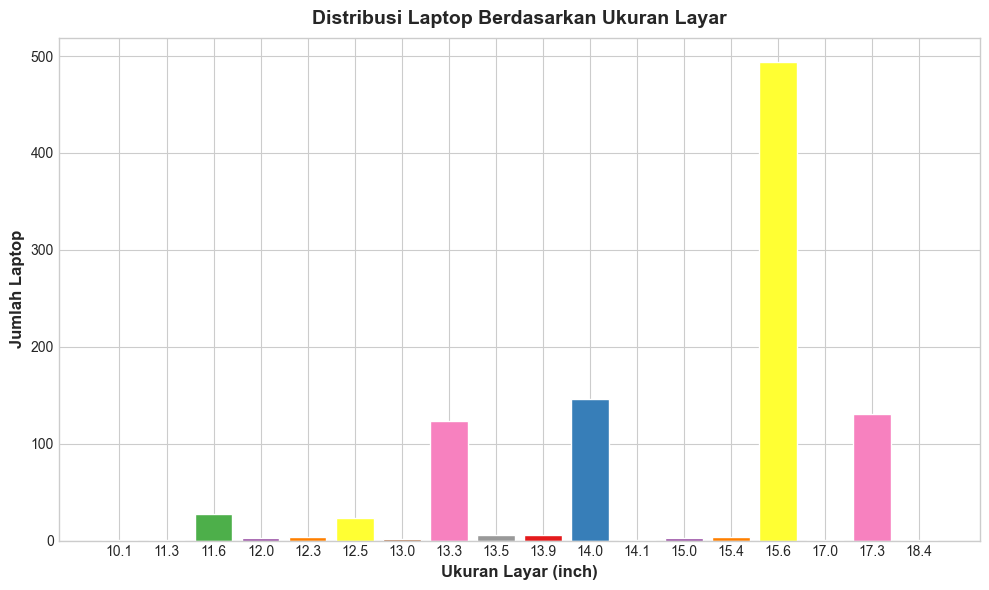

In [12]:
jumlah_screen = laptop['screen(pixel)'].value_counts()
jumlah_screen = jumlah_screen.sort_index()

colors = sns.color_palette('Set1', len(jumlah_screen))

plt.figure(figsize=(10, 6))
plt.bar(jumlah_screen.index, jumlah_screen.values, color = colors)
plt.title("Distribusi Laptop Berdasarkan Ukuran Layar")
plt.xlabel('Ukuran Layar (inch)')
plt.ylabel('Jumlah Laptop')

plt.show()

In [13]:
laptop['ram(GB)'].value_counts()

8     483
4     271
16    149
6      24
12     21
32     16
2      10
24      3
Name: ram(GB), dtype: int64

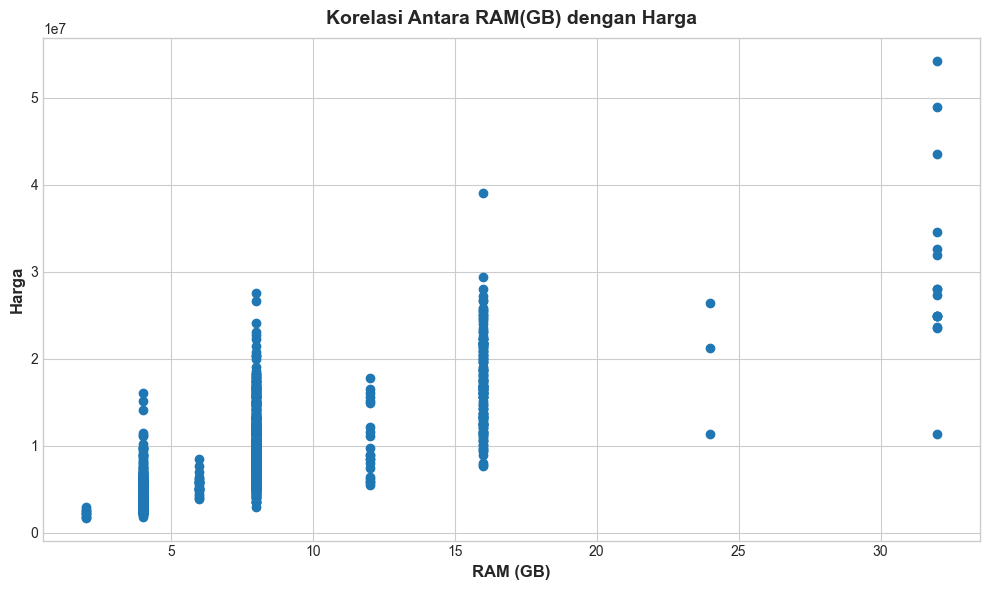

In [14]:
x = laptop['ram(GB)']
y = laptop['price']

plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title('Korelasi Antara RAM(GB) dengan Harga')
plt.xlabel('RAM (GB)')
plt.ylabel('Harga')

plt.show()

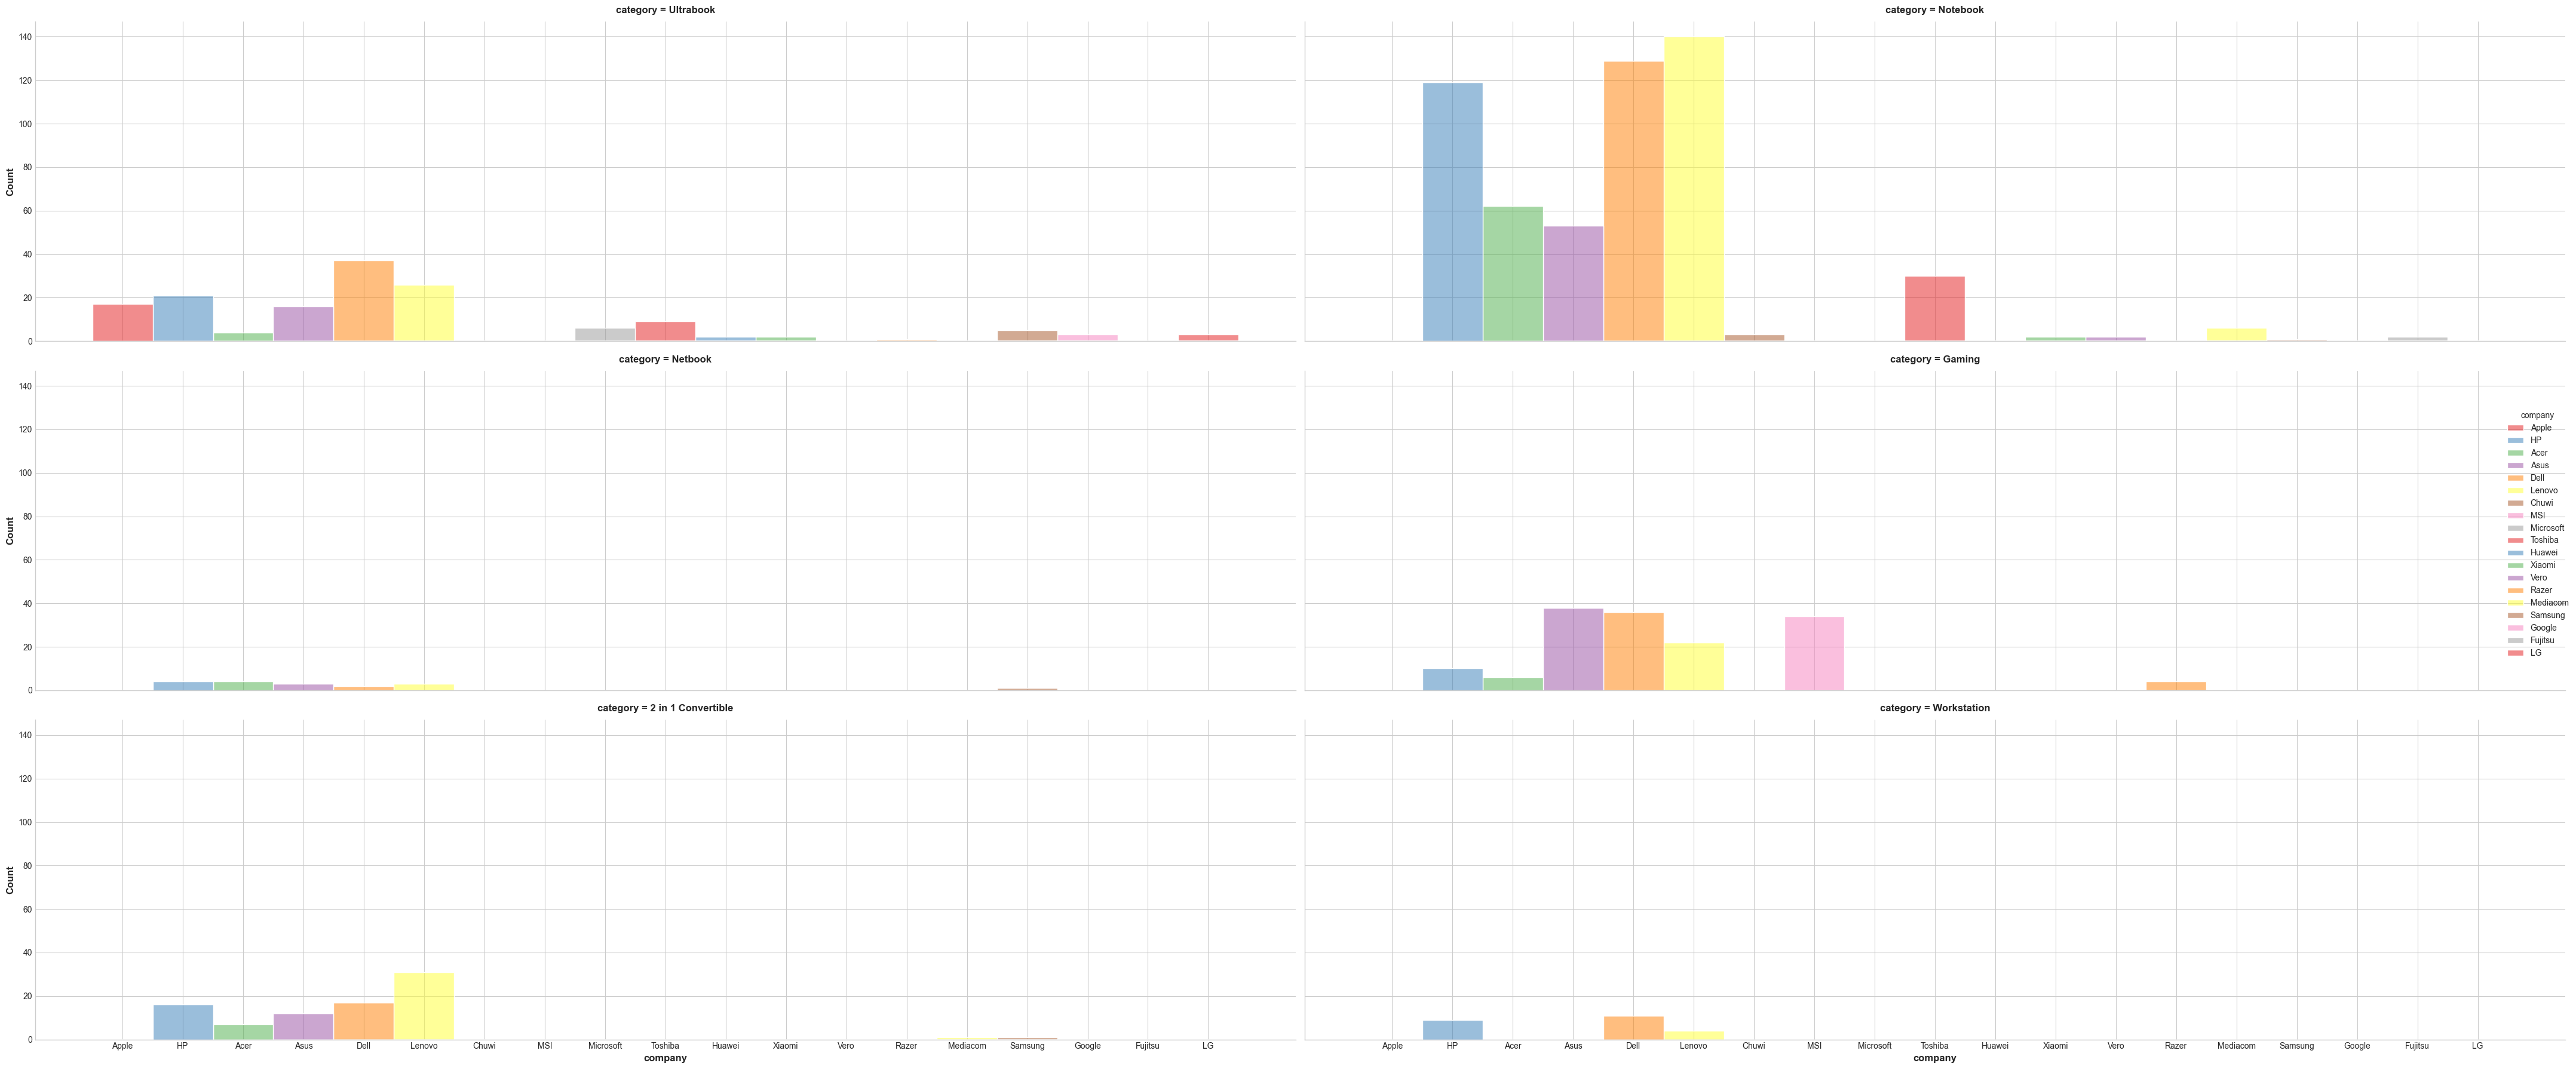

In [15]:
sns.displot(laptop['company'], x = laptop['company'], col=laptop['category'], col_wrap=2, height=6, aspect=3.5, palette='Set1', hue=laptop['company'])
    
plt.show()

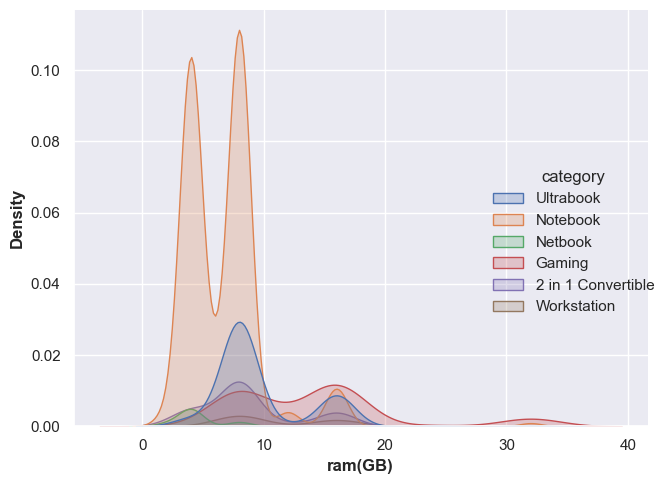

In [53]:
sns.displot(laptop, x = "ram(GB)", kind="kde", hue = "category", fill = True)

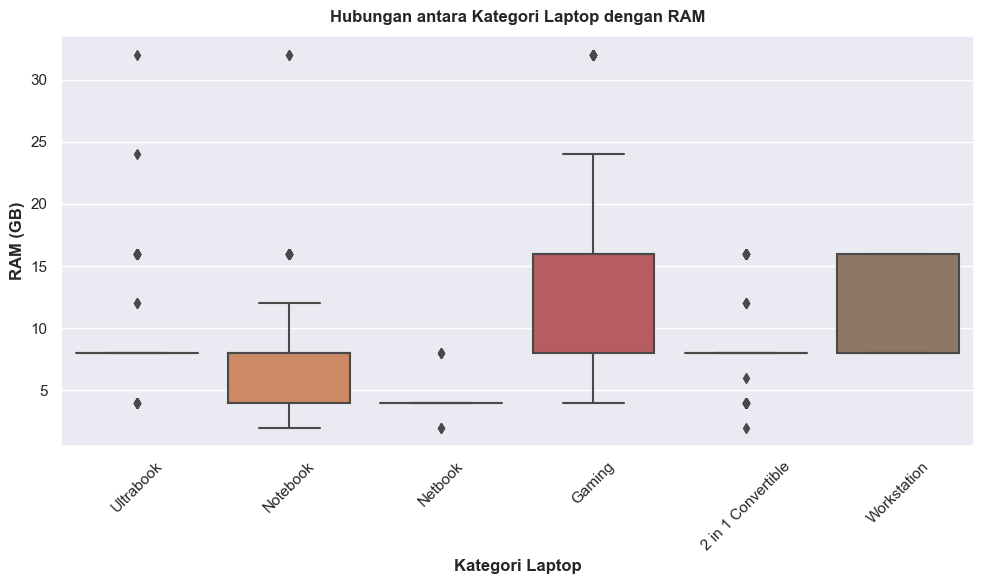

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='category', y='ram(GB)')
plt.title('Hubungan antara Kategori Laptop dengan RAM')
plt.xlabel('Kategori Laptop')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

In [61]:
fig = px.histogram(laptop, x = 'ram(GB)', title="RAM Distribution", marginal = 'violin')
fig.show()

In [58]:
laptop.columns

Index(['company', 'product', 'category', 'screen(pixel)', 'ram(GB)', 'gpu',
       'os', 'os_version', 'weigth(kg)', 'price', 'resolution', 'screentype',
       'touchscreen', 'cpu_name', 'cpu_speed(GHz)', 'cpu_brand',
       'storage_1(GB)', 'storage_2(GB)', 'storage_1_type', 'storage_2_type',
       'gpu_name', 'price_normalized', 'ram_normalized', 'ram(GB)_normalized'],
      dtype='object')

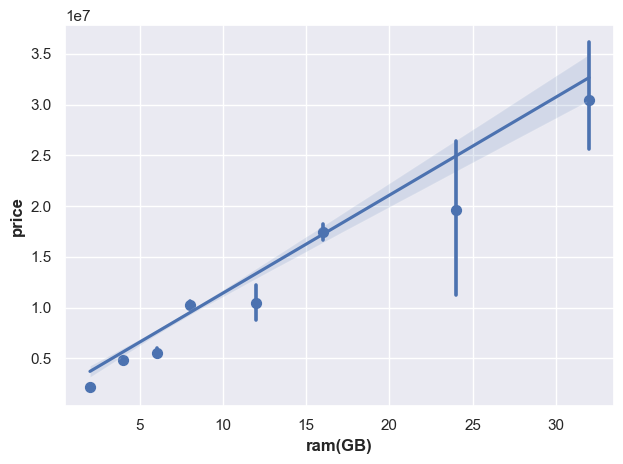

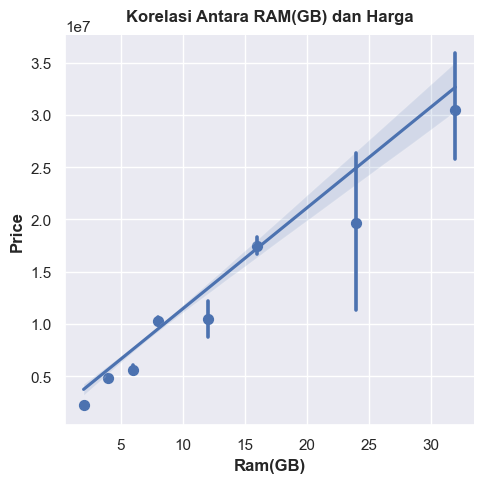

In [62]:
sns.set(style='darkgrid')

sns.regplot(data=laptop, x = 'ram(GB)', y = 'price',  x_estimator=np.mean)
sns.lmplot(data=laptop, x = 'ram(GB)', y = 'price',  x_estimator=np.mean)

plt.title("Korelasi Antara RAM(GB) dan Harga")
plt.xlabel('Ram(GB)')
plt.ylabel('Price')
plt.show()

In [17]:
price_min = laptop['price'].min()
price_max = laptop['price'].max()
laptop['price_normalized'] = (laptop['price'] - price_min / (price_max - price_min))

ram_min = laptop['ram(GB)'].min()
ram_max = laptop['ram(GB)'].max()
laptop['ram_normalized'] = (laptop['ram(GB)'] - ram_min / (ram_max - ram_min))

print(laptop[['price', 'price_normalized', 'ram(GB)', 'ram_normalized']])

           price  price_normalized  ram(GB)  ram_normalized
0    11912523.48      1.191252e+07        8        7.933333
1     7993374.48      7.993374e+06        8        7.933333
2     5112900.00      5.112900e+06        8        7.933333
3    22563005.40      2.256301e+07       16       15.933333
4    16037611.20      1.603761e+07        8        7.933333
..           ...               ...      ...             ...
972  24897600.00      2.489760e+07       32       31.933333
973  10492560.00      1.049256e+07        8        7.933333
974  18227710.80      1.822771e+07       16       15.933333
975   8705268.00      8.705268e+06        8        7.933333
976   8909784.00      8.909784e+06        4        3.933333

[977 rows x 4 columns]


Simple Feature Scaling

In [18]:
laptop["price_normalized"] = laptop["price"] / laptop["price"].max()
laptop["ram(GB)_normalized"] = laptop["ram(GB)"] / laptop["ram(GB)"].max()

print(laptop[['price', 'price_normalized', 'ram(GB)', 'ram_normalized']])

           price  price_normalized  ram(GB)  ram_normalized
0    11912523.48          0.219657        8        7.933333
1     7993374.48          0.147391        8        7.933333
2     5112900.00          0.094278        8        7.933333
3    22563005.40          0.416044       16       15.933333
4    16037611.20          0.295721        8        7.933333
..           ...               ...      ...             ...
972  24897600.00          0.459092       32       31.933333
973  10492560.00          0.193474        8        7.933333
974  18227710.80          0.336104       16       15.933333
975   8705268.00          0.160518        8        7.933333
976   8909784.00          0.164289        4        3.933333

[977 rows x 4 columns]


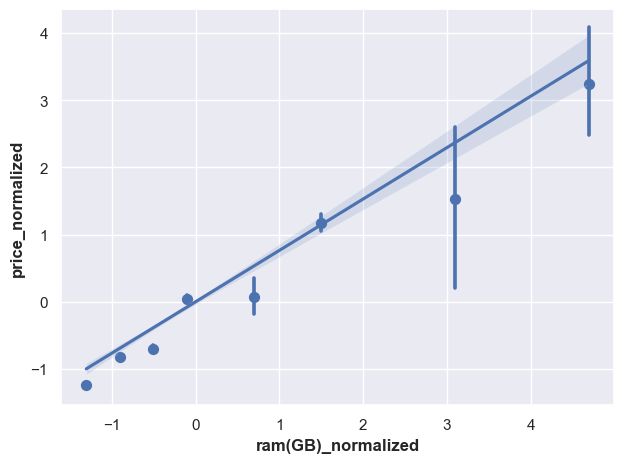

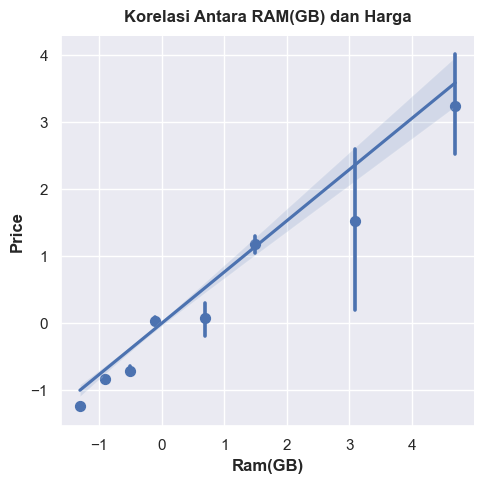

In [65]:
sns.set(style='darkgrid')

sns.regplot(data=laptop, x = 'ram(GB)_normalized', y = 'price_normalized', x_estimator=np.mean)
sns.lmplot(data=laptop, x = 'ram(GB)_normalized', y = 'price_normalized', x_estimator=np.mean)

plt.title("Korelasi Antara RAM(GB) dan Harga")
plt.xlabel('Ram(GB)')
plt.ylabel('Price')
plt.show()

Min-Max

In [20]:
laptop["price_normalized"] = (laptop["price"] - laptop["price"].min()) / (laptop["price"].max() - laptop["price"].min())
laptop["ram(GB)_normalized"] = (laptop["ram(GB)"] - laptop["ram(GB)"].min()) / (laptop["ram(GB)"].max() - laptop["ram(GB)"].min())

print(laptop[['price', 'price_normalized', 'ram(GB)', 'ram_normalized']])

           price  price_normalized  ram(GB)  ram_normalized
0    11912523.48          0.194307        8        7.933333
1     7993374.48          0.119693        8        7.933333
2     5112900.00          0.064854        8        7.933333
3    22563005.40          0.397073       16       15.933333
4    16037611.20          0.272841        8        7.933333
..           ...               ...      ...             ...
972  24897600.00          0.441520       32       31.933333
973  10492560.00          0.167273        8        7.933333
974  18227710.80          0.314537       16       15.933333
975   8705268.00          0.133246        8        7.933333
976   8909784.00          0.137140        4        3.933333

[977 rows x 4 columns]


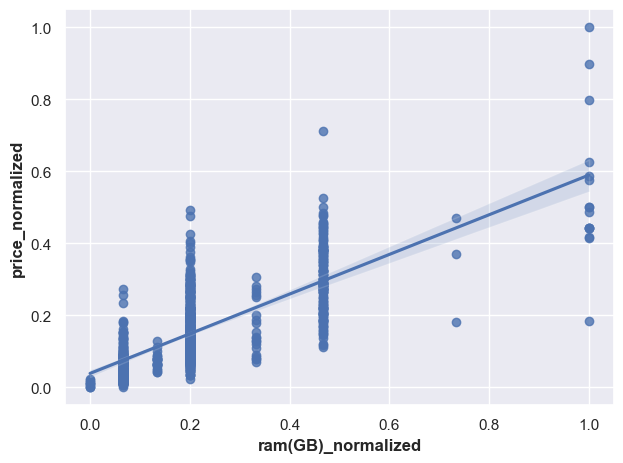

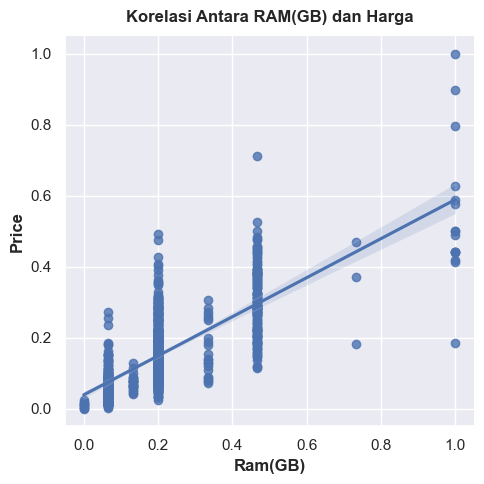

In [21]:
sns.set(style='darkgrid')

sns.regplot(data=laptop, x = 'ram(GB)_normalized', y = 'price_normalized')
sns.lmplot(data=laptop, x = 'ram(GB)_normalized', y = 'price_normalized')

plt.title("Korelasi Antara RAM(GB) dan Harga")
plt.xlabel('Ram(GB)')
plt.ylabel('Price')
plt.show()

Z-Score

In [22]:
laptop["price_normalized"] = (laptop["price"] - laptop["price"].mean()) / laptop["price"].std()
laptop["ram(GB)_normalized"] = (laptop["ram(GB)"] - laptop["ram(GB)"].mean()) / laptop["ram(GB)"].std()

print(laptop[['price', 'price_normalized', 'ram(GB)', 'ram_normalized']])

           price  price_normalized  ram(GB)  ram_normalized
0    11912523.48          0.300254        8        7.933333
1     7993374.48         -0.321199        8        7.933333
2     5112900.00         -0.777951        8        7.933333
3    22563005.40          1.989083       16       15.933333
4    16037611.20          0.954362        8        7.933333
..           ...               ...      ...             ...
972  24897600.00          2.359275       32       31.933333
973  10492560.00          0.075092        8        7.933333
974  18227710.80          1.301642       16       15.933333
975   8705268.00         -0.208315        8        7.933333
976   8909784.00         -0.175886        4        3.933333

[977 rows x 4 columns]


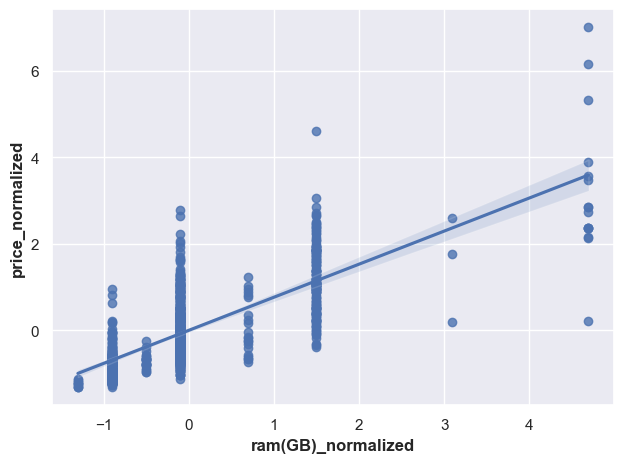

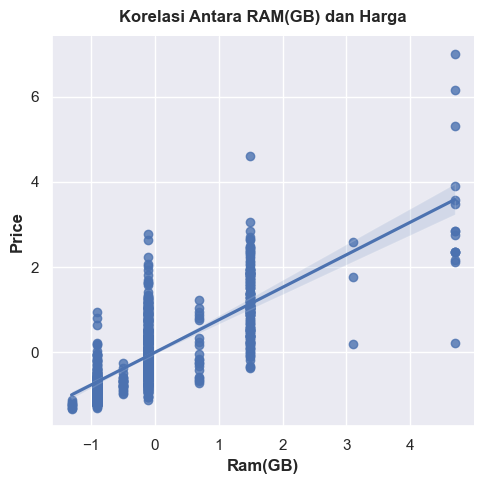

In [23]:
sns.set(style='darkgrid')

sns.regplot(data=laptop, x = 'ram(GB)_normalized', y = 'price_normalized')
sns.lmplot(data=laptop, x = 'ram(GB)_normalized', y = 'price_normalized')

plt.title("Korelasi Antara RAM(GB) dan Harga")
plt.xlabel('Ram(GB)')
plt.ylabel('Price')
plt.show()

<Figure size 1200x800 with 0 Axes>

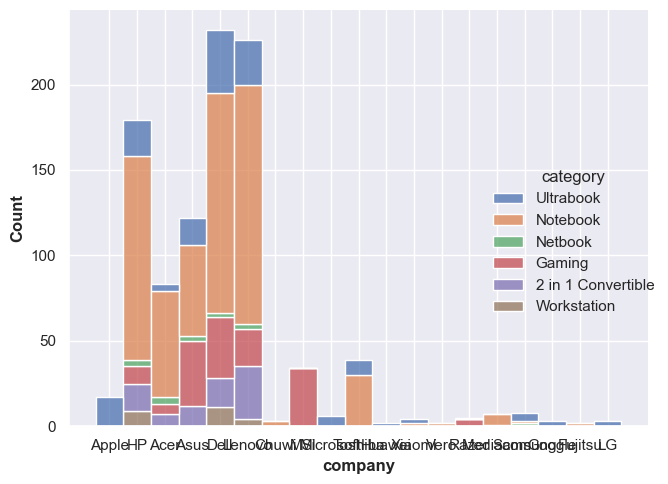

In [39]:
plt.figure(figsize=(12, 8))
sns.displot(laptop, x = "company", hue = "category", multiple = "stack")

In [24]:
laptop.describe()

,ram(GB),weigth(kg),price,touchscreen,cpu_speed(GHz),storage_1(GB),storage_2(GB),price_normalized,ram_normalized,ram(GB)_normalized
count,977.000000,977.000000,9.770000e+02,977.000000,977.000000,977.000000,977.000000,9.770000e+02,977.000000,9.770000e+02
mean,8.528147,2.039128,1.001899e+07,0.144319,2.284033,439.373593,173.776868,1.309086e-16,8.461481,1.454540e-16
std,4.997487,0.666009,6.306430e+06,0.351593,0.523576,364.729684,413.903988,1.000000e+00,4.997487,1.000000e+00
min,2.000000,0.690000,1.706375e+06,0.000000,0.900000,1.000000,0.000000,-1.318118e+00,1.933333,-1.306286e+00
25%,4.000000,1.500000,5.326308e+06,0.000000,1.800000,256.000000,0.000000,-7.441114e-01,3.933333,-9.060849e-01
50%,8.000000,2.020000,8.527428e+06,0.000000,2.500000,256.000000,0.000000,-2.365152e-01,7.933333,-1.056826e-01
75%,8.000000,2.300000,1.311570e+07,0.000000,2.700000,512.000000,0.000000,4.910394e-01,7.933333,-1.056826e-01
max,32.000000,4.700000,5.423231e+07,1.000000,3.600000,2000.000000,2000.000000,7.010831e+00,31.933333,4.696731e+00


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (19,) and arg 1 with shape (14,).

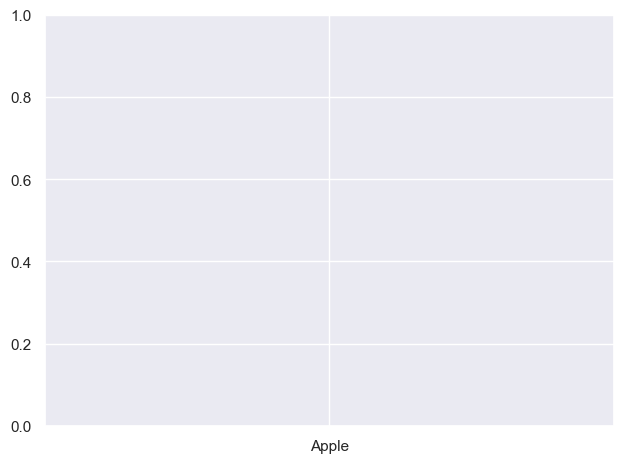

In [25]:
# Data pada kolom "company"
company = laptop['company'].unique()

# Data pada kolom "category" dan "company"
category_counts = {}
for category in laptop['category'].unique():
    category_counts[category] = laptop[laptop['category'] == category]['company'].value_counts().values

width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(len(company))

for category, category_count in category_counts.items():
    p = ax.bar(company, category_count, width, label=category, bottom=bottom)
    bottom += category_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of laptops by category and company')
ax.legend()

plt.show()
